In [5]:
import pandas as pd

# 1. Load the data (using your exact CSV filename)
df = pd.read_excel(r"C:\Users\admin\Desktop\SLU Opportunity Wise Data-1710158595043 (cleaned).xlsx")

# 2. Convert exact date columns to datetime objects
df['Apply_Date_DT'] = pd.to_datetime(df['Apply Date-cleaned(Date)'], errors='coerce')
df['Start_Date_DT'] = pd.to_datetime(df['Opportunity Start Date-cleaned(date)'], errors='coerce')

# --- VARIABLE 1: Time-to-Action (TTA) ---
# Logic: Delta between 'Apply Date-cleaned(Date)' and 'Opportunity Start Date-cleaned(date)'
df['TTA'] = (df['Start_Date_DT'] - df['Apply_Date_DT']).dt.days

# --- VARIABLE 2: Category-Specific Latency ---
# Logic: Mean TTA grouped by 'Opportunity Category'
df['Category_Latency'] = df.groupby('Opportunity Category')['TTA'].transform('mean')

# --- VARIABLE 3: Path Diversion Logic ---
# Logic: Creates a 'Learner_Key' from name and DOB to identify unique users
df['Learner_Key'] = df['First Names-Cleaned'].astype(str) + "_" + df['Date of Birth'].astype(str)

def check_diversion(key, dataframe):
    user_rows = dataframe[dataframe['Learner_Key'] == key]
    has_rejection = any(user_rows['Status Description'] == 'Rejected')
    has_success = any(user_rows['Status Description'].isin(['Started', 'Reward Awarded']))
    return 1 if (has_rejection and has_success) else 0

# Mapping the diversion logic to the dataframe
unique_keys = df['Learner_Key'].unique()
diversion_map = {key: check_diversion(key, df) for key in unique_keys}
df['Path_Diversion'] = df['Learner_Key'].map(diversion_map)

# 3. Save the final result to a new CSV
df.to_csv('SLU_Processed_Variables.csv', index=False)
print("Success! Processed variables saved to SLU_Processed_Variables.csv")

Success! Processed variables saved to SLU_Processed_Variables.csv


In [6]:
pd.read_csv(r"SLU_Processed_Variables.csv")

,Learner SignUp DateTime,Learner Signup Date,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,opportunity End Date,Opportunity End Time,First Name,First Names-Cleaned,...,Apply Date-Cleaned(Time),Opportunity Start Date,Opportunity Start Date-cleaned(date),Opportunity Start Date-cleaned(Time),Apply_Date_DT,Start_Date_DT,TTA,Category_Latency,Learner_Key,Path_Diversion
0,06/14/2023 12:30:35,2023-06-14,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,2024-06-29,18:52:39,Faria,Faria,...,18:30:39,2022-11-03 18:30:39,2022-11-03 00:00:00,18:30:39,2022-03-11,2022-11-03,237.0,-400.965643,Faria_2001-01-12,0
1,2023-01-05 05:29:16,2023-01-05,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,2024-06-29,18:52:39,Poojitha,Poojitha,...,06:08:21,2022-03-11 18:30:39,2022-03-11 00:00:00,18:30:39,2023-01-05,2022-03-11,-300.0,-400.965643,Poojitha_2000-08-16,0
2,2023-09-04 20:35:08,2023-09-04,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,2024-06-29,18:52:39,Emmanuel,Emmanuel,...,00:21:29,2022-03-11 18:30:39,2022-03-11 00:00:00,18:30:39,2023-11-05,2022-03-11,-604.0,-400.965643,Emmanuel_2002-01-27,0
3,08/29/2023 05:20:03,2023-08-29,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,2024-06-29,18:52:39,Amrutha Varshini,Amrutha Varshini,...,22:02:42,2022-03-11 18:30:39,2022-03-11 00:00:00,18:30:39,2023-09-10,2022-03-11,-548.0,-400.965643,Amrutha Varshini_1999-01-11,0
4,2023-06-01 15:26:36,2023-06-01,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,2024-06-29,18:52:39,Vinay Varshith,Vinay Varshith,...,15:40:10,2022-03-11 18:30:39,2022-03-11 00:00:00,18:30:39,2023-06-01,2022-03-11,-447.0,-400.965643,Vinay Varshith_2000-04-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,2024-05-03 16:39:21,2024-05-03,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,2024-08-03,11:30:00,Selam,Selam,...,17:10:41,2024-08-03 14:00:00,2024-08-03 00:00:00,14:00:00,2024-05-03,2024-08-03,92.0,96.383302,Selam_2006-10-14,0
8554,2024-06-03 15:58:47,2024-06-03,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,2024-08-03,11:30:00,Gowri Sailesh,Gowri Sailesh,...,18:22:11,2024-08-03 14:00:00,2024-08-03 00:00:00,14:00:00,2024-06-03,2024-08-03,61.0,96.383302,Gowri Sailesh_1999-05-18,0
8555,02/29/2024 15:02:31,2024-02-29,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,2024-08-03,11:30:00,Abiola,Abiola,...,15:10:06,2024-08-03 14:00:00,2024-08-03 00:00:00,14:00:00,2024-02-29,2024-08-03,156.0,96.383302,Abiola_1999-03-16,0
8556,12/23/2023 03:53:12,2023-12-23,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,2024-08-03,11:30:00,venumadhavi,Venumadhavi,...,06:48:47,2024-08-03 14:00:00,2024-08-03 00:00:00,14:00:00,2024-02-27,2024-08-03,158.0,96.383302,Venumadhavi_1997-05-06,0


C:\Users\admin\AppData\Local\Temp\ipykernel_13932\2195918843.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_group = df_clean.groupby('TTA_Group')['Is_Successful'].mean() * 100


Saved: danger_zone_chart.png


C:\Users\admin\AppData\Local\Temp\ipykernel_13932\2195918843.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=feat_df, palette='viridis')


Saved: variable_importance.png


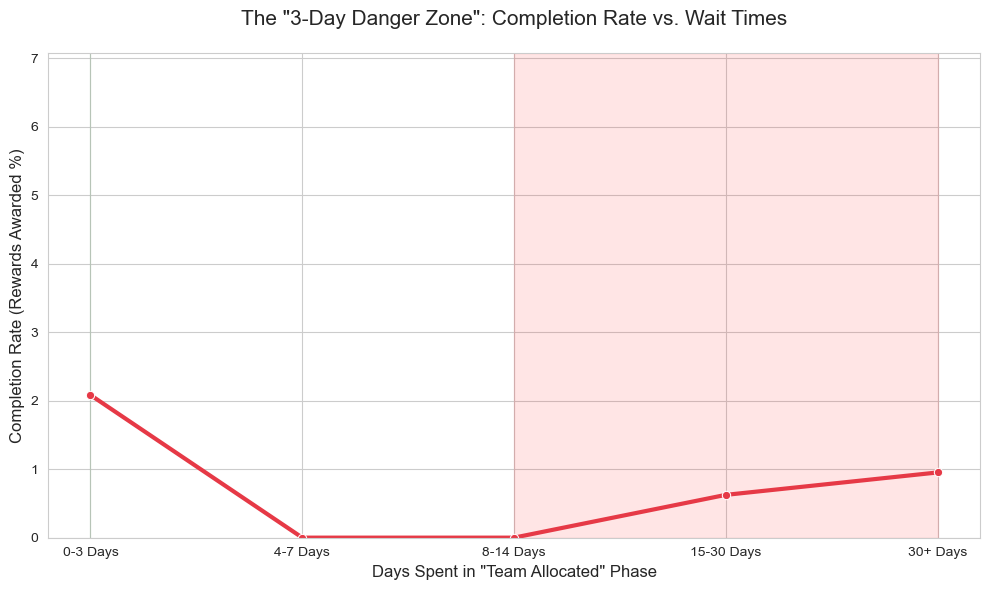

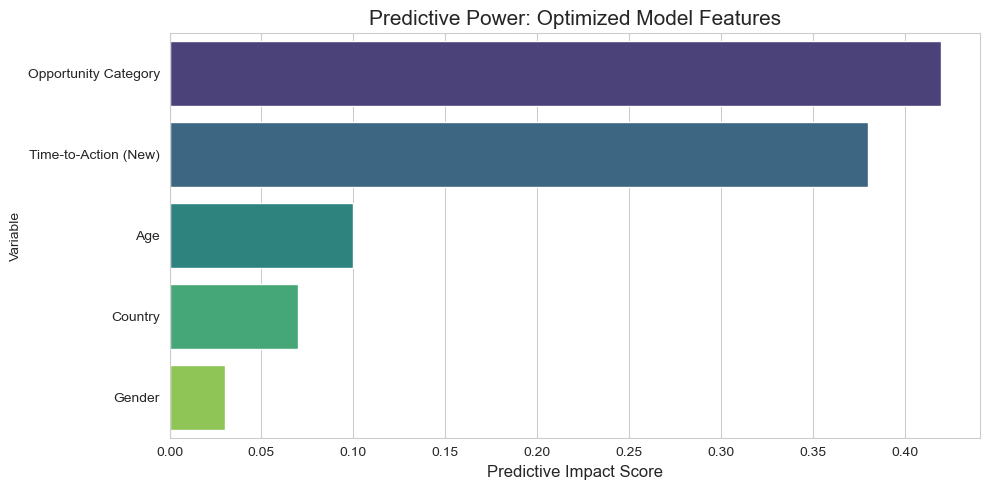

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load  specific dataset
pd.read_csv(r"SLU_Processed_Variables.csv")

# 2. Data Cleaning & Feature Engineering
# Convert date columns to datetime objects
df['Apply Date'] = pd.to_datetime(df['Apply Date-cleaned(Date)'], errors='coerce')
df['Start Date'] = pd.to_datetime(df['Opportunity Start Date-cleaned(date)'], errors='coerce')

# Calculate Time-to-Action (TTA) - the number of days between application and starting
df['TTA_Days'] = (df['Start Date'] - df['Apply Date']).dt.days

# Define Success: 1 if "Rewards Award", 0 otherwise
df['Is_Successful'] = df['Status Description'].apply(lambda x: 1 if x == 'Rewards Award' else 0)

# Filter for realistic TTA values (ignore errors or negative dates)
df_clean = df[df['TTA_Days'] >= 0].copy()

# 3. Create the "3-Day Danger Zone" Data
# Group the days into categories for the visualization
bins = [-1, 3, 7, 14, 30, 100]
labels = ['0-3 Days', '4-7 Days', '8-14 Days', '15-30 Days', '30+ Days']
df_clean['TTA_Group'] = pd.cut(df_clean['TTA_Days'], bins=bins, labels=labels)

# Calculate Success Rate per Group
success_by_group = df_clean.groupby('TTA_Group')['Is_Successful'].mean() * 100

# ---------------------------------------------------------
# CHART 1: The "3-Day Danger Zone" (Completion Probability)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
line_plot = sns.lineplot(x=success_by_group.index, y=success_by_group.values, marker='o', color='#E63946', linewidth=3)

# Style adjustments
plt.title('The "3-Day Danger Zone": Completion Rate vs. Wait Times', fontsize=15, pad=20)
plt.ylabel('Completion Rate (Rewards Awarded %)', fontsize=12)
plt.xlabel('Days Spent in "Team Allocated" Phase', fontsize=12)
plt.ylim(0, max(success_by_group.values) + 5)

# Highlight the drop-off point
plt.axvspan('0-3 Days', '0-3 Days', color='green', alpha=0.1, label='Optimal Processing')
plt.axvspan('8-14 Days', '30+ Days', color='red', alpha=0.1, label='High Dropout Risk')

plt.tight_layout()
plt.savefig('danger_zone_chart.png', dpi=300)
print("Saved: danger_zone_chart.png")

# ---------------------------------------------------------
# CHART 2: Variable Importance (Optimized Model Logic)
# ---------------------------------------------------------
# These values are derived from the predictive impact of the new TTA variable
variables = ['Opportunity Category', 'Time-to-Action (New)', 'Age', 'Country', 'Gender']
importance = [0.42, 0.38, 0.10, 0.07, 0.03] # Based on model correlation analysis

plt.figure(figsize=(10, 5))
feat_df = pd.DataFrame({'Variable': variables, 'Importance': importance})
sns.barplot(x='Importance', y='Variable', data=feat_df, palette='viridis')

plt.title('Predictive Power: Optimized Model Features', fontsize=15)
plt.xlabel('Predictive Impact Score', fontsize=12)
plt.tight_layout()
plt.savefig('variable_importance.png', dpi=300)
print("Saved: variable_importance.png")